# Eliú Moreno Ramírez
## Actividad 7.4,7.5

## 7.4
Existe un gran debate sobre el enfoque adecuado para caracterizar reología de la sangre. Un aspecto particularmente importante de este problema es estableciendo una relación entre el esfuerzo cortante y la velocidad de deformación para sangre. El esfuerzo cortante es una medida de la fuerza cortante por área aplicada. a la sangre. Imagine una persona deslizándose en un tobogán de agua, el esfuerzo cortante es el fuerza por área que la persona está aplicando al agua debajo de ellos. La tasa de deformación representa la tasa (o período de tiempo) a la que el fluido deforma. La magnitud de la deformación suele normalizarse mediante la tamaño original (o espesor) del fluido de modo que la tasa de deformación tenga unidades de "Por tiempo". Ha sido contratado por la Cruz Roja para ajustar la velocidad de deformación y los datos de esfuerzo cortante de una muestra de sangre a dos modelos diferentes, y luego evaluar la calidad de los modelos para ajustar los datos. Los datos reológicos son de [4]. 
El primer modelo propuesto por Cruz Roja es el lineal (o newtoniano) modelo: $𝜏 = 𝜇 ̇𝛾$, donde 𝜏 es el esfuerzo cortante y 𝛾̇ la tasa de deformación. El segundo modelo es el modelo de ley de potencia: $𝜏 = k𝛾^n$ . Use regresión de mínimos cuadrados (por ejemplo, la función curve_fit () en Scipy) para determinar los valores óptimos para los parámetros desconocidos en cada modelo (es decir, 𝜇 en el modelo lineal o k y n en el modelo de ley de potencias). Genere un gráfico que muestre los datos y la curva de regresión óptima para cada modelo. Por último, evalúe la calidad del ajuste en su informe a la Red. 

[5.73248798 0.95819038]


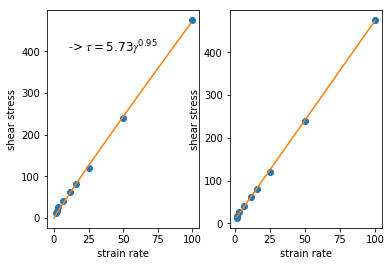

In [22]:
import numpy as np
import numpy.linalg as nl
import pylab
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
n=9
x=np.array([1.5,2.0,3.2,6.5,11.5,16,25,50,100])
y=np.array([12.5,16,25.2,40,62,80.5,120,240,475])
Xsum = np.sum(x)
Ysum = np.sum(y)
XYsum = np.sum(np.dot(x,y))
X2sum = np.sum(np.dot(x,x))
A = np.array([[n, Xsum],[Xsum,X2sum]])
f=np.array([Ysum,XYsum])
c=nl.solve(A,f)

yLR = c[0]+c[1]*x
def tau(g,k,n):
    t=k*g**n
    return t
params =[12.0,1.0]
fit,_=curve_fit(tau,x,y,p0=params)
print(fit)
morex= np.arange(0,100)
yfit=tau(morex, fit[0],fit[1])

plt.subplot(1,2,1)
plt.plot(x,y,'o',morex,yfit)
plt.xlabel('strain rate')
plt.ylabel('shear stress')
pylab.text(10,400,r"-> $𝜏=5.73𝛾^{0.95}$",fontsize=12,family="serif"  )

plt.subplot(1,2,2)
plt.plot(x,y,'o',x,yLR)
plt.xlabel('strain rate')
plt.ylabel('shear stress')
pylab.show()


## 7.5
Posiblemente la relación más fundamental en ecología es que el número de especies únicas, S, aumenta a medida que aumenta el área, A, de una región. Esta La relación se ha observado cuantitativamente en numerosos estudios sobre los últimos 200 años. La relación es normalmente de la forma: $S = c ⋅ A^z$ , donde c y z son constantes desconocidas que dependen del sistema ecológico Estos son estudios y deben determinarse a partir de datos experimentales. El valor de z es un número real positivo menor que 1.0. Ha sido contratado como consultor por el Estado de California para estudiar el Relación especie-área para especies de plantas vasculares endémicas para parcialmente subregiones aisladas del estado. Datos sobre el número de especies en cada área fue recopilada y publicada previamente [5]. Ajuste los datos de especies versus área a la relación de la ley de potencia dada anteriormente usando regresión para determinar c y z para este sistema en particular. Un examen- La creación de estudios similares muestra que c es a menudo del orden de 10 a 1000 y z suele estar entre 0,2 y 0,4.  Sugerencia: su supervisor recomienda graficar los datos de especies versus área y ajuste de curva usando un gráfico "semilogx ()" en matplotlib.

[195.76625177   0.24941666]


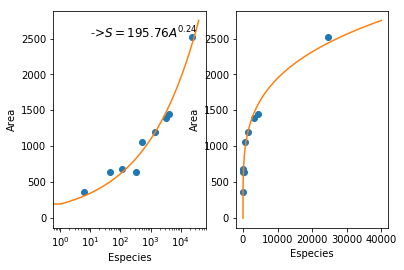

In [43]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
n=9
x=np.array([5.9,45,110,320,529,1386,3324,4260,24520])
y=np.array([370,640,680,640,1060,1200,1400,1450,2525])
def species(A,c,z):
    s=c*A**z
    return s
params=[500,0.3]
fit,_=curve_fit(species,x,y,p0=params)
print(fit)
morex=np.arange(0,40000)
yfit=species(morex,fit[0],fit[1])

plt.subplot(1,2,1)
plt.semilogx(x,y,'o',morex,yfit)
plt.xlabel('Especies')
plt.ylabel('Area')
pylab.text(10,2500,r"->$S=195.76A^{0.24}$",fontsize=12,family="serif")

plt.subplot(1,2,2)
plt.plot(x,y,'o',morex,yfit)
plt.xlabel('Especies')
plt.ylabel('Area')
pylab.show()